working on new code for `Measurement.recalculate`

In [59]:
import numpy as np

import pyqtgraph as pg
from cmm_error_map import data_cmpts as dc
from cmm_error_map import design_linear as design
from cmm_error_map import  gui_cmpts as gc

import matplotlib.pyplot as plt

In [91]:
p0 = dc.Probe(title="P0", name="p0", length=np.array([0, 0, 0]))
cmm = dc.pmm_866
mmt = dc.Measurement(
    title="m1",
    name="mmt_00",
    artefact=dc.default_artefacts["KOBA 0620"],
    transform3d=pg.Transform3D(),
    probe=p0,
    cmm_nominal=None,
    cmm_dev=None,
    mmt_nominal=None,
    mmt_dev=None,

)
model_params = dc.model_parameters_dict.copy()
mmt.transform3d = gc.vec_to_transform3d([10,10,10], (45, 20, 10))
mmt.transform3d


Transform3D((0.925417, 0.115383, 0.360958, 10, 0.163176, 0.73836, -0.654368, 10, -0.34202, 0.664463, 0.664463, 10, 0, 0, 0, 1))

In [92]:
nx, ny = mmt.artefact.nballs
ball_range = np.arange(nx * ny)
x = (ball_range) % nx * mmt.artefact.ball_spacing
y = (ball_range) // nx * mmt.artefact.ball_spacing
z = (ball_range) * 0.0
xyz = np.stack((x, y, z))
mmt.cmm_nominal = mmt.transform3d.map(xyz).T
mmt.cmm_nominal.shape, mmt.cmm_nominal

((25, 3),
 array([[  10.        ,   10.        ,   10.        ],
        [ 133.08039838,   31.70239612,  -35.48867652],
        [ 256.16079676,   53.40479225,  -80.97735304],
        [ 379.24119514,   75.10718837, -126.46602955],
        [ 502.32159352,   96.8095845 , -171.95470607],
        [  25.34590916,  108.20189422,   98.37357682],
        [ 148.42630754,  129.90429035,   52.8849003 ],
        [ 271.50670592,  151.60668647,    7.39622378],
        [ 394.58710431,  173.3090826 ,  -38.09245273],
        [ 517.66750269,  195.01147872,  -83.58112925],
        [  40.69181833,  206.40378845,  186.74715364],
        [ 163.77221671,  228.10618457,  141.25847712],
        [ 286.85261509,  249.8085807 ,   95.7698006 ],
        [ 409.93301347,  271.51097682,   50.28112409],
        [ 533.01341185,  293.21337295,    4.79244757],
        [  56.03772749,  304.60568267,  275.12073046],
        [ 179.11812587,  326.3080788 ,  229.63205394],
        [ 302.19852425,  348.01047492,  184.14337742],


In [93]:
np.apply_along_axis(design.linear_model_point, 1, mmt.cmm_nominal, xyzt=p0.length, model_params=model_params, fixed_table=False, bridge_axis=1 )

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [94]:

# deformed position of plate relative to nominal - in CMM CSY
mmt.cmm_dev = design.linear_model_matrix(
    mmt.cmm_nominal,
    p0.length,
    model_params,
    cmm.cmm_model.fixed_table,
    cmm.cmm_model.bridge_axis,
)

In [95]:
mmt.cmm_dev

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [96]:
cmm_deform = mmt.cmm_nominal + mmt.cmm_dev
cmm_deform

array([[  10.        ,   10.        ,   10.        ],
       [ 133.08039838,   31.70239612,  -35.48867652],
       [ 256.16079676,   53.40479225,  -80.97735304],
       [ 379.24119514,   75.10718837, -126.46602955],
       [ 502.32159352,   96.8095845 , -171.95470607],
       [  25.34590916,  108.20189422,   98.37357682],
       [ 148.42630754,  129.90429035,   52.8849003 ],
       [ 271.50670592,  151.60668647,    7.39622378],
       [ 394.58710431,  173.3090826 ,  -38.09245273],
       [ 517.66750269,  195.01147872,  -83.58112925],
       [  40.69181833,  206.40378845,  186.74715364],
       [ 163.77221671,  228.10618457,  141.25847712],
       [ 286.85261509,  249.8085807 ,   95.7698006 ],
       [ 409.93301347,  271.51097682,   50.28112409],
       [ 533.01341185,  293.21337295,    4.79244757],
       [  56.03772749,  304.60568267,  275.12073046],
       [ 179.11812587,  326.3080788 ,  229.63205394],
       [ 302.19852425,  348.01047492,  184.14337742],
       [ 425.27892263,  369.

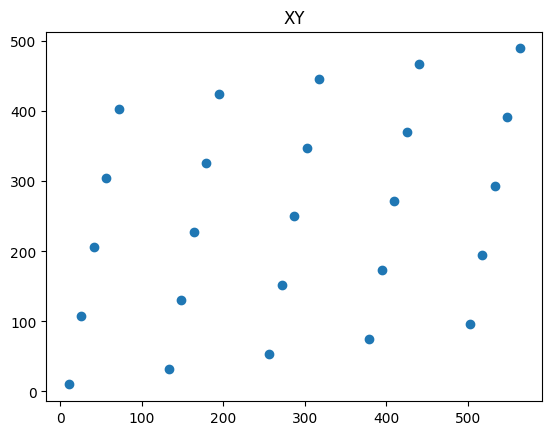

In [97]:
plt.scatter(cmm_deform[:, 0], cmm_deform[:,1])
plt.title("XY");

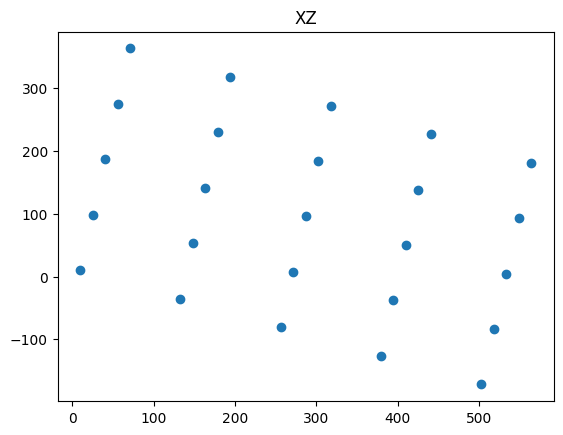

In [98]:
plt.scatter(cmm_deform[:, 0], cmm_deform[:,2])
plt.title("XZ");

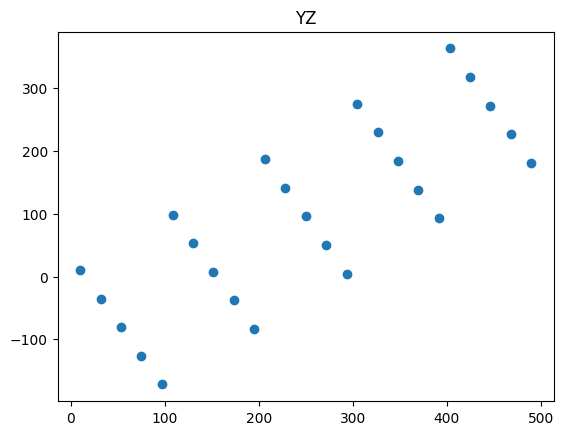

In [99]:
plt.scatter(cmm_deform[:, 1], cmm_deform[:,2])
plt.title("YZ");

In [100]:
tinv = mmt.transform3d.inverted()[0]
tinv


Transform3D((0.925417, 0.163176, -0.34202, -7.46572, 0.115383, 0.73836, 0.664463, -15.1821, 0.360958, -0.654368, 0.664463, -3.71053, 0, 0, 0, 1))

In [101]:
xyz = tinv.map(cmm_deform.T).T
xyz

array([[-8.34465027e-07,  3.27825546e-07,  1.19209290e-07],
       [ 1.32999985e+02,  1.26718163e-07,  8.01876055e-07],
       [ 2.65999971e+02, -7.43892201e-08,  1.48454282e-06],
       [ 3.98999958e+02, -2.75496589e-07,  2.16720957e-06],
       [ 5.31999944e+02, -4.76603986e-07,  2.84987635e-06],
       [-1.03557241e-06,  1.32999986e+02, -5.18001355e-06],
       [ 1.32999985e+02,  1.32999985e+02, -4.49734678e-06],
       [ 2.65999971e+02,  1.32999985e+02, -3.81468001e-06],
       [ 3.98999957e+02,  1.32999985e+02, -3.13201325e-06],
       [ 5.31999943e+02,  1.32999985e+02, -2.44934648e-06],
       [-1.23667979e-06,  2.65999971e+02, -1.04792364e-05],
       [ 1.32999985e+02,  2.65999971e+02, -9.79656963e-06],
       [ 2.65999971e+02,  2.65999970e+02, -9.11390285e-06],
       [ 3.98999957e+02,  2.65999970e+02, -8.43123610e-06],
       [ 5.31999943e+02,  2.65999970e+02, -7.74856932e-06],
       [-1.43778716e-06,  3.98999956e+02, -1.57784592e-05],
       [ 1.32999985e+02,  3.98999956e+02

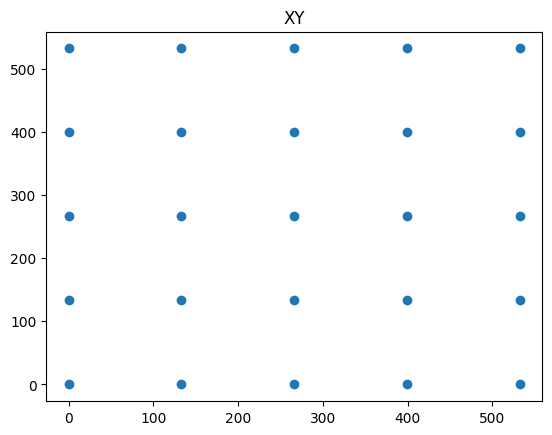

In [102]:
plt.scatter(xyz[:, 0], xyz[:,1])
plt.title("XY");

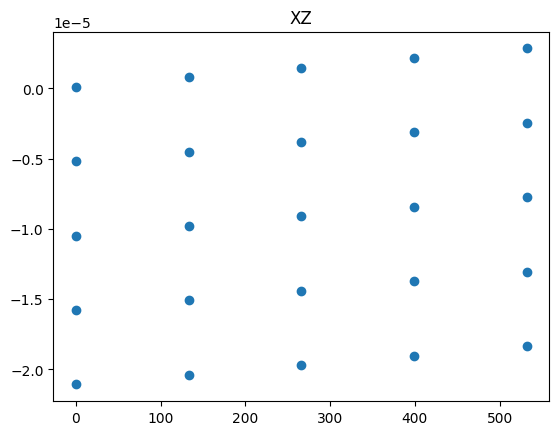

In [103]:
plt.scatter(xyz[:, 0],xyz[:,2])
plt.title("XZ");

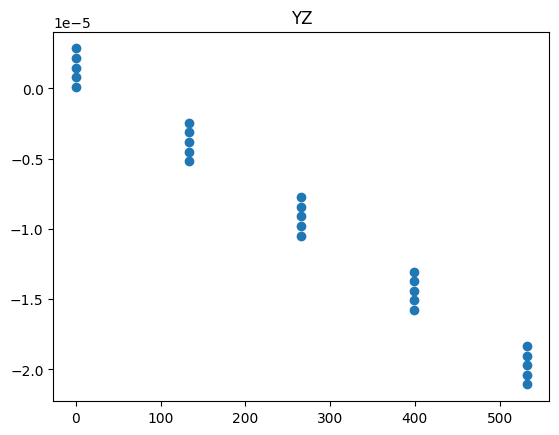

In [104]:
plt.scatter(xyz[:, 1],xyz[:,2])
plt.title("YZ");

Would expect for no deformation ie model_params == 0 that Z after inverse transform would be all 0.0?

In [111]:
mat = gc.vec_to_transform3d([10,10,10], (45, 20, 10))
mat

Transform3D((0.925417, 0.115383, 0.360958, 10, 0.163176, 0.73836, -0.654368, 10, -0.34202, 0.664463, 0.664463, 10, 0, 0, 0, 1))

In [112]:
nx, ny = mmt.artefact.nballs
ball_range = np.arange(nx * ny)
x = (ball_range) % nx * mmt.artefact.ball_spacing
y = (ball_range) // nx * mmt.artefact.ball_spacing
z = (ball_range) * 0.0
xyz = np.stack((x, y, z))

In [115]:
txyz = mat.map(xyz)
txyz

array([[  10.        ,  133.08039838,  256.16079676,  379.24119514,
         502.32159352,   25.34590916,  148.42630754,  271.50670592,
         394.58710431,  517.66750269,   40.69181833,  163.77221671,
         286.85261509,  409.93301347,  533.01341185,   56.03772749,
         179.11812587,  302.19852425,  425.27892263,  548.35932101,
          71.38363665,  194.46403503,  317.54443341,  440.6248318 ,
         563.70523018],
       [  10.        ,   31.70239612,   53.40479225,   75.10718837,
          96.8095845 ,  108.20189422,  129.90429035,  151.60668647,
         173.3090826 ,  195.01147872,  206.40378845,  228.10618457,
         249.8085807 ,  271.51097682,  293.21337295,  304.60568267,
         326.3080788 ,  348.01047492,  369.71287104,  391.41526717,
         402.80757689,  424.50997302,  446.21236914,  467.91476527,
         489.61716139],
       [  10.        ,  -35.48867652,  -80.97735304, -126.46602955,
        -171.95470607,   98.37357682,   52.8849003 ,    7.39622378,


In [116]:
mat_inv = mat.inverted()[0]
mat_inv

Transform3D((0.925417, 0.163176, -0.34202, -7.46572, 0.115383, 0.73836, 0.664463, -15.1821, 0.360958, -0.654368, 0.664463, -3.71053, 0, 0, 0, 1))

In [118]:
ttxyz = mat_inv.map(txyz)
ttxyz

array([[-8.34465027e-07,  1.32999985e+02,  2.65999971e+02,
         3.98999958e+02,  5.31999944e+02, -1.03557241e-06,
         1.32999985e+02,  2.65999971e+02,  3.98999957e+02,
         5.31999943e+02, -1.23667979e-06,  1.32999985e+02,
         2.65999971e+02,  3.98999957e+02,  5.31999943e+02,
        -1.43778716e-06,  1.32999985e+02,  2.65999971e+02,
         3.98999957e+02,  5.31999943e+02, -1.63889456e-06,
         1.32999984e+02,  2.65999971e+02,  3.98999957e+02,
         5.31999943e+02],
       [ 3.27825546e-07,  1.26718163e-07, -7.43892201e-08,
        -2.75496589e-07, -4.76603986e-07,  1.32999986e+02,
         1.32999985e+02,  1.32999985e+02,  1.32999985e+02,
         1.32999985e+02,  2.65999971e+02,  2.65999971e+02,
         2.65999970e+02,  2.65999970e+02,  2.65999970e+02,
         3.98999956e+02,  3.98999956e+02,  3.98999956e+02,
         3.98999955e+02,  3.98999955e+02,  5.31999941e+02,
         5.31999941e+02,  5.31999941e+02,  5.31999941e+02,
         5.31999940e+02],
    

In [119]:
ttxyz-xyz

array([[-8.34465027e-07, -1.47104619e-05, -2.85864588e-05,
        -4.24624557e-05, -5.63384525e-05, -1.03557241e-06,
        -1.49115693e-05, -2.87875661e-05, -4.26635630e-05,
        -5.65395599e-05, -1.23667979e-06, -1.51126767e-05,
        -2.89886735e-05, -4.28646704e-05, -5.67406672e-05,
        -1.43778716e-06, -1.53137840e-05, -2.91897809e-05,
        -4.30657778e-05, -5.69417747e-05, -1.63889456e-06,
        -1.55148914e-05, -2.93908883e-05, -4.32668851e-05,
        -5.71428820e-05],
       [ 3.27825546e-07,  1.26718163e-07, -7.43892201e-08,
        -2.75496589e-07, -4.76603986e-07, -1.44307236e-05,
        -1.46318310e-05, -1.48329384e-05, -1.50340458e-05,
        -1.52351532e-05, -2.91892728e-05, -2.93903802e-05,
        -2.95914876e-05, -2.97925950e-05, -2.99937024e-05,
        -4.39478221e-05, -4.41489294e-05, -4.43500368e-05,
        -4.45511442e-05, -4.47522515e-05, -5.87063712e-05,
        -5.89074787e-05, -5.91085860e-05, -5.93096934e-05,
        -5.95108008e-05],
    

In [121]:
np_mat = mat.matrix()
np_mat

array([[ 0.92541653,  0.11538278,  0.3609584 , 10.        ],
       [ 0.16317591,  0.73836011, -0.65436834, 10.        ],
       [-0.34202012,  0.66446298,  0.66446298, 10.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [137]:
xyz1 = np.vstack((xyz, np.ones((1, xyz.shape[1]))))
xyz1.shape

(4, 25)

In [139]:
xyz1

array([[  0., 133., 266., 399., 532.,   0., 133., 266., 399., 532.,   0.,
        133., 266., 399., 532.,   0., 133., 266., 399., 532.,   0., 133.,
        266., 399., 532.],
       [  0.,   0.,   0.,   0.,   0., 133., 133., 133., 133., 133., 266.,
        266., 266., 266., 266., 399., 399., 399., 399., 399., 532., 532.,
        532., 532., 532.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.]])

In [143]:
t1 = np_mat @ xyz1
t1

array([[  10.        ,  133.08039838,  256.16079676,  379.24119514,
         502.32159352,   25.34590916,  148.42630754,  271.50670592,
         394.58710431,  517.66750269,   40.69181833,  163.77221671,
         286.85261509,  409.93301347,  533.01341185,   56.03772749,
         179.11812587,  302.19852425,  425.27892263,  548.35932101,
          71.38363665,  194.46403503,  317.54443341,  440.6248318 ,
         563.70523018],
       [  10.        ,   31.70239612,   53.40479225,   75.10718837,
          96.8095845 ,  108.20189422,  129.90429035,  151.60668647,
         173.3090826 ,  195.01147872,  206.40378845,  228.10618457,
         249.8085807 ,  271.51097682,  293.21337295,  304.60568267,
         326.3080788 ,  348.01047492,  369.71287104,  391.41526717,
         402.80757689,  424.50997302,  446.21236914,  467.91476527,
         489.61716139],
       [  10.        ,  -35.48867652,  -80.97735304, -126.46602955,
        -171.95470607,   98.37357682,   52.8849003 ,    7.39622378,


In [144]:
np_inv = np.linalg.inv(np_mat)
np_inv

array([[  0.92541662,   0.16317593,  -0.34202016,  -7.46572394],
       [  0.1153828 ,   0.73836016,   0.66446308, -15.18206051],
       [  0.36095842,  -0.65436835,   0.66446305,  -3.71053116],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

In [147]:
t2 = np_inv @ t1
t2

array([[ 0.00000000e+00,  1.33000000e+02,  2.66000000e+02,
         3.99000000e+02,  5.32000000e+02,  5.32907052e-15,
         1.33000000e+02,  2.66000000e+02,  3.99000000e+02,
         5.32000000e+02, -1.77635684e-15,  1.33000000e+02,
         2.66000000e+02,  3.99000000e+02,  5.32000000e+02,
         5.32907052e-15,  1.33000000e+02,  2.66000000e+02,
         3.99000000e+02,  5.32000000e+02,  1.24344979e-14,
         1.33000000e+02,  2.66000000e+02,  3.99000000e+02,
         5.32000000e+02],
       [-3.55271368e-15, -7.10542736e-15, -7.10542736e-15,
        -1.95399252e-14, -3.37507799e-14,  1.33000000e+02,
         1.33000000e+02,  1.33000000e+02,  1.33000000e+02,
         1.33000000e+02,  2.66000000e+02,  2.66000000e+02,
         2.66000000e+02,  2.66000000e+02,  2.66000000e+02,
         3.99000000e+02,  3.99000000e+02,  3.99000000e+02,
         3.99000000e+02,  3.99000000e+02,  5.32000000e+02,
         5.32000000e+02,  5.32000000e+02,  5.32000000e+02,
         5.32000000e+02],
    

In [148]:
t2 - xyz1

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         5.68434189e-14,  0.00000000e+00,  5.32907052e-15,
         0.00000000e+00,  0.00000000e+00,  5.68434189e-14,
         0.00000000e+00, -1.77635684e-15,  2.84217094e-14,
         5.68434189e-14,  0.00000000e+00,  0.00000000e+00,
         5.32907052e-15,  2.84217094e-14,  5.68434189e-14,
         5.68434189e-14,  0.00000000e+00,  1.24344979e-14,
         2.84217094e-14,  5.68434189e-14,  5.68434189e-14,
         0.00000000e+00],
       [-3.55271368e-15, -7.10542736e-15, -7.10542736e-15,
        -1.95399252e-14, -3.37507799e-14, -2.84217094e-14,
        -2.84217094e-14, -2.84217094e-14, -2.84217094e-14,
        -2.84217094e-14, -5.68434189e-14, -5.68434189e-14,
        -5.68434189e-14, -5.68434189e-14, -5.68434189e-14,
        -5.68434189e-14, -5.68434189e-14, -5.68434189e-14,
        -1.13686838e-13, -5.68434189e-14,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
    

In [151]:
xyz2 = mat.inverted()[0].map(mat.map(xyz)) - xyz
xyz2

array([[-8.34465027e-07, -1.47104619e-05, -2.85864588e-05,
        -4.24624557e-05, -5.63384525e-05, -1.03557241e-06,
        -1.49115693e-05, -2.87875661e-05, -4.26635630e-05,
        -5.65395599e-05, -1.23667979e-06, -1.51126767e-05,
        -2.89886735e-05, -4.28646704e-05, -5.67406672e-05,
        -1.43778716e-06, -1.53137840e-05, -2.91897809e-05,
        -4.30657778e-05, -5.69417747e-05, -1.63889456e-06,
        -1.55148914e-05, -2.93908883e-05, -4.32668851e-05,
        -5.71428820e-05],
       [ 3.27825546e-07,  1.26718163e-07, -7.43892201e-08,
        -2.75496589e-07, -4.76603986e-07, -1.44307236e-05,
        -1.46318310e-05, -1.48329384e-05, -1.50340458e-05,
        -1.52351532e-05, -2.91892728e-05, -2.93903802e-05,
        -2.95914876e-05, -2.97925950e-05, -2.99937024e-05,
        -4.39478221e-05, -4.41489294e-05, -4.43500368e-05,
        -4.45511442e-05, -4.47522515e-05, -5.87063712e-05,
        -5.89074787e-05, -5.91085860e-05, -5.93096934e-05,
        -5.95108008e-05],
    

In [152]:
xyz2.max(), xyz2.min()

(2.8498763526840776e-06, -5.951080083832494e-05)

In [153]:
np_mat = mat.matrix()
np_inv = np.linalg.inv(np_mat)
xyz1 = np.vstack((xyz, np.ones((1, xyz.shape[1]))))
xyz3 = (np_inv @ (np_mat @ xyz1) ) - xyz1
xyz3.max(), xyz3.min()


(5.684341886080802e-14, -1.1368683772161603e-13)